In [1]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
artifacts_path = os.getcwd().removesuffix('notebook\\model')+'artifacts\\'

In [3]:
df = pd.read_csv(artifacts_path + 'eco-1990-2022.csv')

In [4]:
germany_data = df[df['Entity']=='Germany']
germany_data = germany_data[['Year','Entity','gdp_ppp']]
usa_data = df[df['Entity']=='United States']
usa_data = usa_data[['Year','Entity','gdp_ppp']]
india_data = df[df['Entity']=='India']
india_data = india_data[['Year','Entity','gdp_ppp']]

### Exponential Smoothing

In [5]:
# Fit Exponential Smoothing models for forecasting

india_model = ExponentialSmoothing(india_data['gdp_ppp'], trend='add', seasonal=None, damped_trend=True).fit()
usa_model = ExponentialSmoothing(usa_data['gdp_ppp'], trend='add', seasonal=None, damped_trend=True).fit()
germany_model = ExponentialSmoothing(germany_data['gdp_ppp'], trend='add', seasonal=None, damped_trend=True).fit()

c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [6]:
# Extended forecast for 1000 years
forecast_years_extended = 1000
future_years_extended = list(range(2023, 2023 + forecast_years_extended))

# Generate extended forecasts for India, USA, and Germany (assuming models are pre-fitted)
india_forecast_extended = india_model.forecast(forecast_years_extended)
usa_forecast_extended = usa_model.forecast(forecast_years_extended)
germany_forecast_extended = germany_model.forecast(forecast_years_extended)

# Combine extended forecasts into a DataFrame
forecast_df_extended = pd.DataFrame({
    'Year': future_years_extended,
    'India_GDP_Forecast': india_forecast_extended,
    'USA_GDP_Forecast': usa_forecast_extended,
    'Germany_GDP_Forecast': germany_forecast_extended,
})

forecast_df_extended['India_vs_USA'] = forecast_df_extended['India_GDP_Forecast'] - forecast_df_extended['USA_GDP_Forecast']
forecast_df_extended['India_vs_Germany'] = forecast_df_extended['India_GDP_Forecast'] - forecast_df_extended['Germany_GDP_Forecast']

# Find crossover years
crossover_year_usa = forecast_df_extended[forecast_df_extended['India_vs_USA'] >= 0].iloc[0]['Year'] if not forecast_df_extended[forecast_df_extended['India_vs_USA'] >= 0].empty else None
crossover_year_germany = forecast_df_extended[forecast_df_extended['India_vs_Germany'] >= 0].iloc[0]['Year'] if not forecast_df_extended[forecast_df_extended['India_vs_Germany'] >= 0].empty else None

c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\sathy\anaconda3\envs\eco\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in

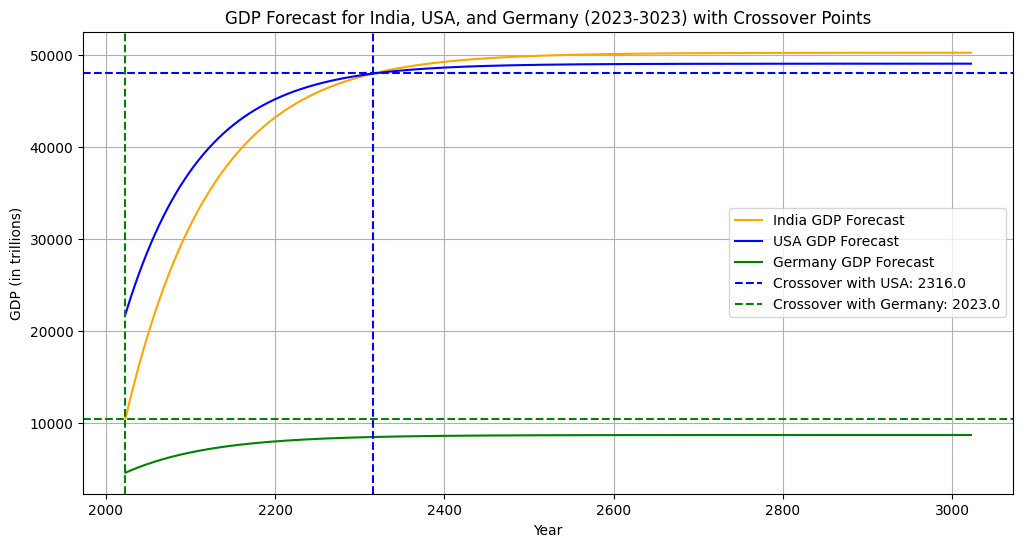

In [7]:
# Plot the GDP forecasts
plt.figure(figsize=(12, 6))
plt.plot(forecast_df_extended['Year'], forecast_df_extended['India_GDP_Forecast'], label='India GDP Forecast', color='orange')
plt.plot(forecast_df_extended['Year'], forecast_df_extended['USA_GDP_Forecast'], label='USA GDP Forecast', color='blue')
plt.plot(forecast_df_extended['Year'], forecast_df_extended['Germany_GDP_Forecast'], label='Germany GDP Forecast', color='green')

# Mark the crossover points
if crossover_year_usa:
    india_gdp_at_crossover_usa = forecast_df_extended[forecast_df_extended['Year'] == crossover_year_usa]['India_GDP_Forecast'].values[0]
    plt.axvline(x=crossover_year_usa, color='blue', linestyle='--', label=f'Crossover with USA: {crossover_year_usa}')
    plt.axhline(y=india_gdp_at_crossover_usa, color='blue', linestyle='--')

if crossover_year_germany:
    india_gdp_at_crossover_germany = forecast_df_extended[forecast_df_extended['Year'] == crossover_year_germany]['India_GDP_Forecast'].values[0]
    plt.axvline(x=crossover_year_germany, color='green', linestyle='--', label=f'Crossover with Germany: {crossover_year_germany}')
    plt.axhline(y=india_gdp_at_crossover_germany, color='green', linestyle='--')

# Add title, labels, and legend
plt.title('GDP Forecast for India, USA, and Germany (2023-3023) with Crossover Points')
plt.xlabel('Year')
plt.ylabel('GDP (in trillions)')
plt.legend()
plt.grid()
plt.show()
